<a href="https://colab.research.google.com/github/Miss-Pradhi/ML-LAB-Assignment/blob/main/LAB-5_Implementation_Gradient_Descent_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

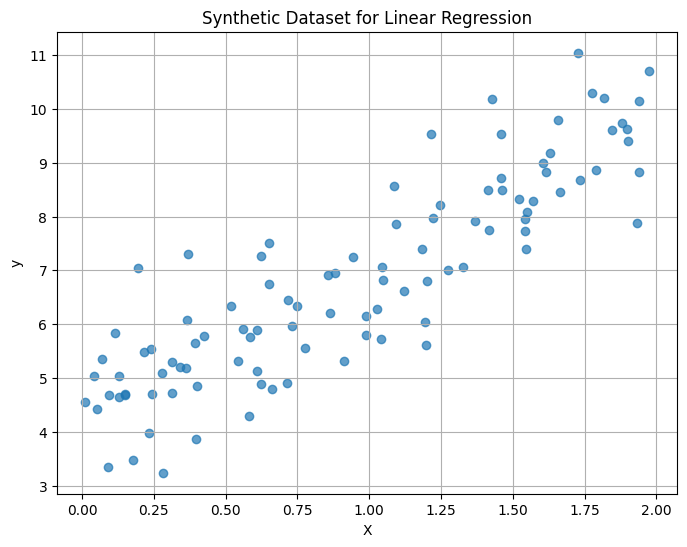

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Dataset for Linear Regression')
plt.grid(True)
plt.show()


In [34]:
def compute_cost(X, y, theta):
    """Computes the Mean Squared Error cost function."""
    m = len(y) # Number of training examples
    predictions = X.dot(theta)
    sq_errors = (predictions - y)**2
    cost = (1 / (2 * m)) * np.sum(sq_errors)
    return cost


In [35]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    """Performs Gradient Descent to learn theta."""
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        # Update theta for each parameter
        theta = theta - (1 / m) * learning_rate * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Prepare the data for Gradient Descent (add a bias term X0 = 1)
X_b = np.c_[np.ones((len(X), 1)), X]

# Initialize parameters (theta)
theta = np.random.randn(2, 1) # Random initialization for theta0 (intercept) and theta1 (slope)

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

print(f"Initial Theta: {theta.flatten()}")

# Run Gradient Descent
final_theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

print(f"Final Theta (intercept, slope): {final_theta.flatten()}")
print(f"Final Cost: {cost_history[-1]:.4f}")


Initial Theta: [0.01300189 1.45353408]
Final Theta (intercept, slope): [3.90261498 3.04601728]
Final Cost: 0.4180


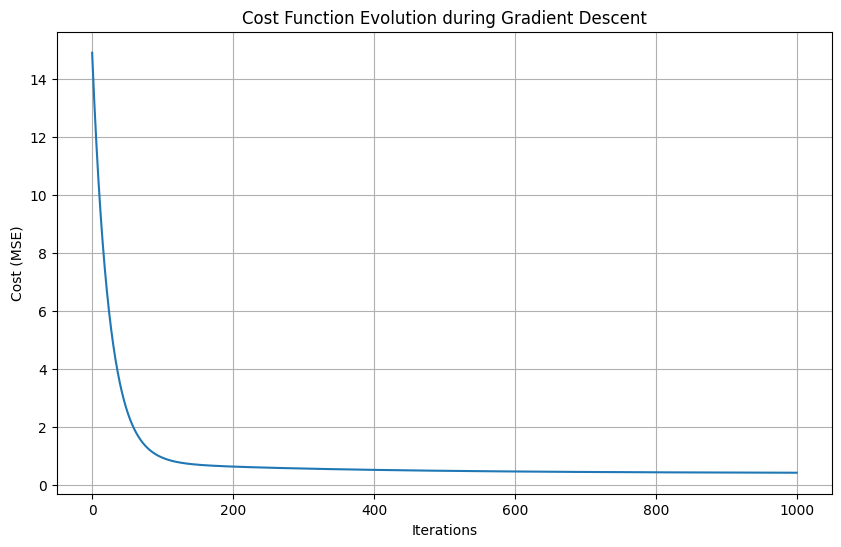

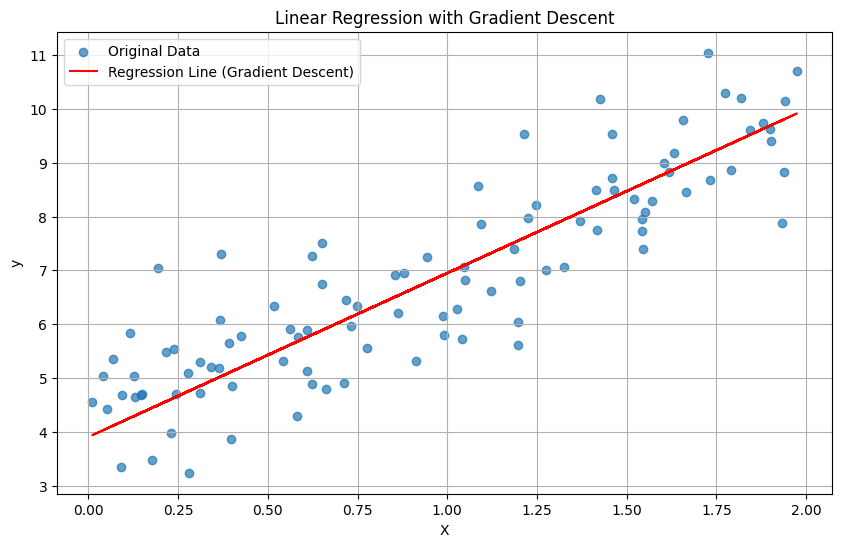

In [36]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Evolution during Gradient Descent')
plt.grid(True)
plt.show()

# Plot the data with the final regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, X_b.dot(final_theta), color='red', label='Regression Line (Gradient Descent)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()
